In [215]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
import numpy as np
import datetime
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.ticker as ticker

#from scipy import stats

import plotly.graph_objects as go
#sns.set_context('paper', font_scale=1.4)

In [288]:
df = pd.read_csv('data.csv',
                          parse_dates=['dateRep'])

continents = ['Africa', 'America', 'Asia', 'Oceania', 'Europe']

df = df.rename(columns = {"dateRep": "date"})
df = df.rename(columns = {"continentExp": "continent"})
df = df.rename(columns = {"countriesAndTerritories": "country"})

df = df.drop(columns=['geoId', 'countryterritoryCode', 'day', 'month', 'year'])


df.set_index('date', inplace=True)


In [289]:
df.dtypes

cases            int64
deaths           int64
country         object
popData2018    float64
continent       object
dtype: object

In [290]:
df.sample(5)

,cases,deaths,country,popData2018,continent
date,,,,,
2020-01-27,0,0,Australia,2.499237e+07,Oceania
2020-10-05,1268,124,Canada,3.705886e+07,America
2020-02-16,0,0,North_Macedonia,2.082958e+06,Europe
2020-10-02,2974,97,China,1.392730e+09,Asia
2020-05-20,0,0,Vietnam,9.554040e+07,Asia


In [291]:
df.columns

Index(['cases', 'deaths', 'country', 'popData2018', 'continent'], dtype='object')

In [292]:
df.describe()

,cases,deaths,popData2018
count,18412.000000,18412.000000,1.817100e+04
mean,269.442483,17.809255,5.114234e+07
std,1695.275537,124.850076,1.750804e+08
min,-2461.000000,0.000000,1.000000e+03
25%,0.000000,0.000000,2.254126e+06
50%,2.000000,0.000000,9.630959e+06
75%,40.000000,1.000000,3.602914e+07
max,48529.000000,4928.000000,1.392730e+09


In [293]:
print(df)

            cases  deaths      country  popData2018 continent
date                                                         
2020-05-21    492       9  Afghanistan   37172386.0      Asia
2020-05-20    581       5  Afghanistan   37172386.0      Asia
2020-05-19    408       4  Afghanistan   37172386.0      Asia
2020-05-18    262       1  Afghanistan   37172386.0      Asia
2020-05-17      0       0  Afghanistan   37172386.0      Asia
...           ...     ...          ...          ...       ...
2020-03-25      0       0     Zimbabwe   14439018.0    Africa
2020-03-24      0       1     Zimbabwe   14439018.0    Africa
2020-03-23      0       0     Zimbabwe   14439018.0    Africa
2020-03-22      1       0     Zimbabwe   14439018.0    Africa
2020-03-21      1       0     Zimbabwe   14439018.0    Africa

[18412 rows x 5 columns]


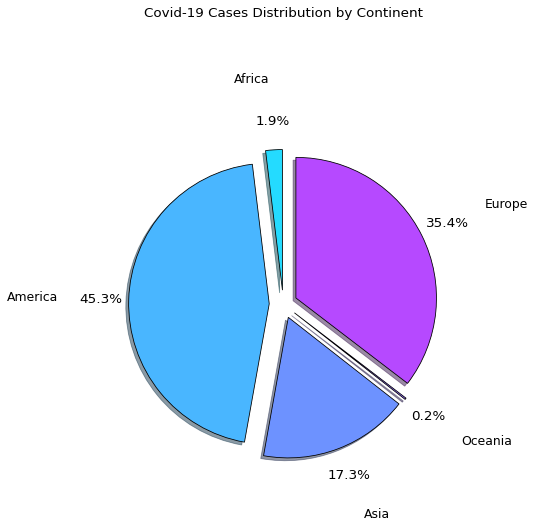

In [294]:
#Group cases by Continent and get totals

sns.set_palette('cool')
plt.figure(figsize=(8,8))

tot_cases = []

africa_cases = df.groupby('continent')['cases'].sum()['Africa']
america_cases = df.groupby('continent')['cases'].sum()['America']
asia_cases = df.groupby('continent')['cases'].sum()['Asia']
europe_cases = df.groupby('continent')['cases'].sum()['Europe']
oceania_cases = df.groupby('continent')['cases'].sum()['Oceania']

tot_cases.extend([africa_cases, america_cases, asia_cases, oceania_cases, europe_cases])

explode = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(tot_cases, labels =continents, explode=explode,
        shadow= True, startangle=90, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.5,
        wedgeprops={'edgecolor': 'black'})



plt.title("Covid-19 Cases Distribution by Continent", y=1.3)
plt.tight_layout()
plt.show()


             cases                                          deaths          \
continent   Africa  America     Asia   Europe Oceania Other Africa America   
date                                                                         
2019-12-31     0.0      0.0     27.0      0.0     0.0   0.0    0.0     0.0   
2020-01-01     0.0      0.0      0.0      0.0     0.0   0.0    0.0     0.0   
2020-01-02     0.0      2.0   2110.0      6.0     2.0   0.0    0.0     0.0   
2020-01-03     2.0     11.0   1403.0    402.0     1.0   0.0    0.0     1.0   
2020-01-04   489.0  28711.0   7706.0  35529.0   164.0   NaN   23.0  1011.0   
...            ...      ...      ...      ...     ...   ...    ...     ...   
2020-12-01     0.0      0.0      0.0      0.0     0.0   0.0    0.0     0.0   
2020-12-02     0.0      0.0   2031.0      2.0     0.0  39.0    0.0     0.0   
2020-12-03    13.0    362.0   1624.0   5522.0    14.0   NaN    1.0     2.0   
2020-12-04   714.0  33519.0  12979.0  33490.0    68.0   NaN   52

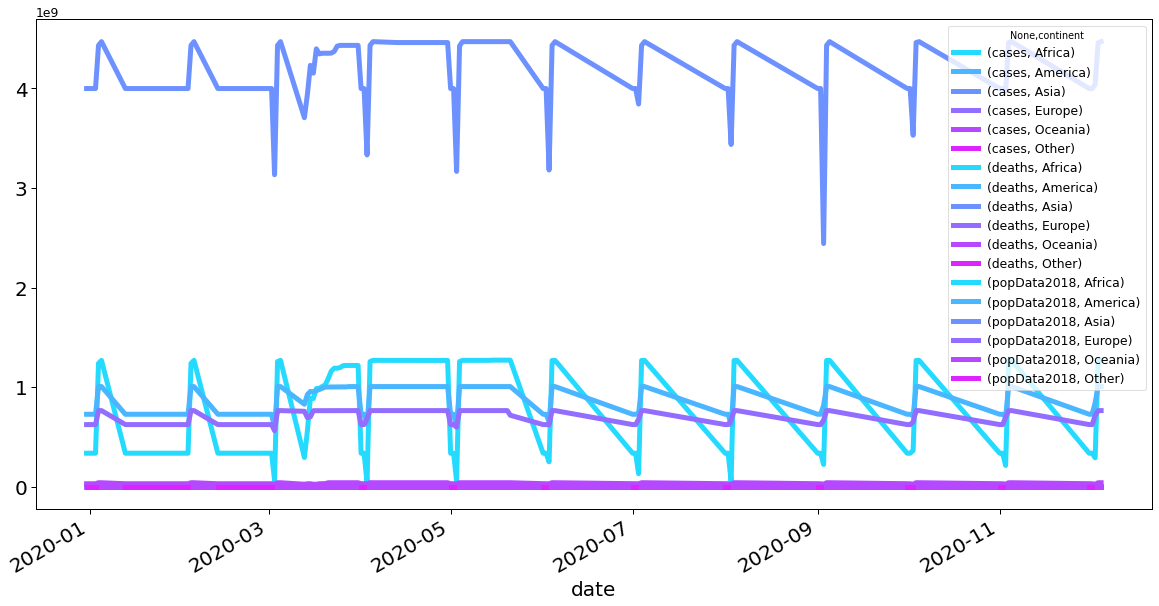

In [297]:
# The data is organised by day and country. Here I want to re- organise it by continent, and sum the cases from each day. 
# So instead of having several values for a day - country -continent; I will only have  Day1-Continent , Day2-continent.. etc. 

#I pivoted the data, result: i get totals for each day by continent. 

# Question 1: How can I make a day to sum the previous day... So i can show the growing cases.
# Question 2: I want to do a line chart showing every continent. But I can't.
# bonus: then I will do the same for deaths. 


#Group dates by day and sum cases

time_series = df.pivot_table(index='date',columns='continent', aggfunc=sum)
print(time_series)

time_series.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20);